In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.providers.basic_provider import BasicProvider
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

TOKEN = "db8a920ff114d3ffbd56d0b7d766ce669aa16b3bc5bc62bbb19e4578373354833c9b52df7d45cc66ab4b8630c1cbdc90a38ef18ca36ac7966fcf91bd6c77d90d"
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

In [4]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )

In [5]:
def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

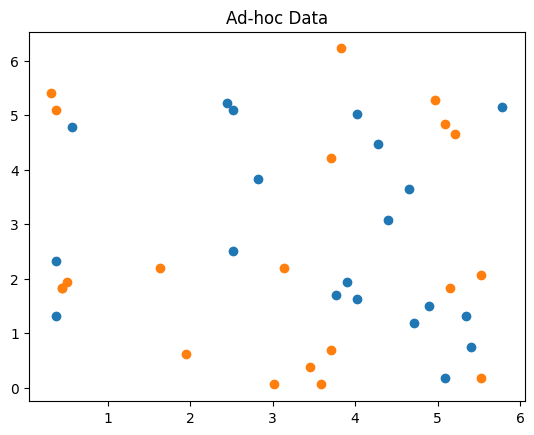

In [6]:
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=20,
    n=2,
    gap=0.3,
    plot_data=True,
    one_hot=False,
    include_sample_total=True,
)

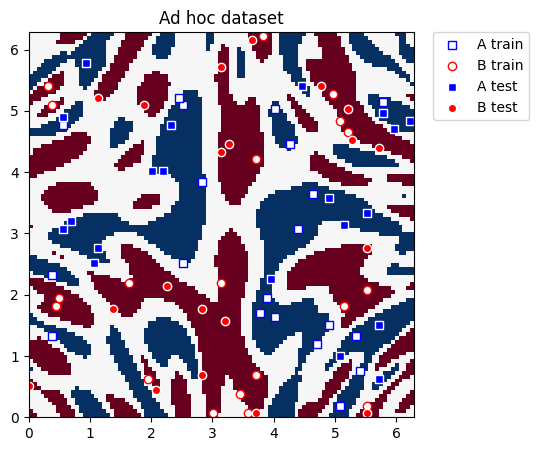

In [7]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

In [8]:
backend = service.backend('ibmq_qasm_simulator')
optimizer = SPSA(maxiter=100)
optimizer.set_options(save_steps=1)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

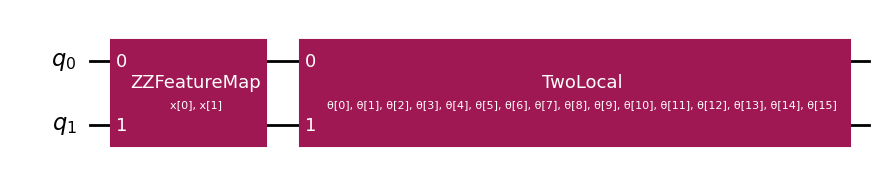

In [9]:
vqc.circuit.draw(output='mpl')

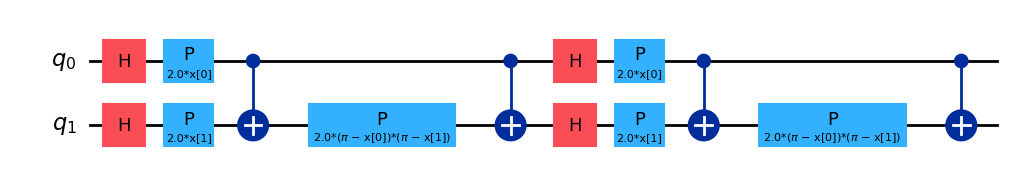

In [10]:
vqc.feature_map.decompose().draw(output='mpl')

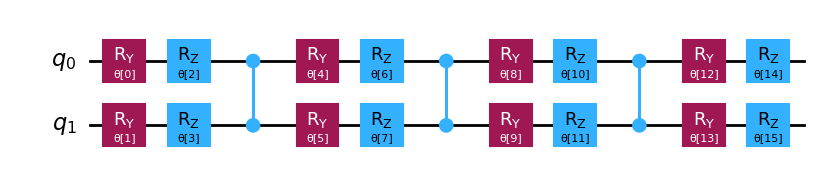

In [11]:
vqc.ansatz.decompose().draw(output='mpl')

In [12]:
vqc.fit(train_features, train_labels)

In [13]:
vqc.score(train_features, train_labels)

1.0

In [14]:
vqc.score(test_features, test_labels)

1.0

In [15]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")

Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Ground truth:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
